In [17]:
!pip install pycaret -q

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 29.3 MB/s eta 0:00:00


In [56]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.decomposition import PCA

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [36]:
caminho_cafe_saudavel = '/content/drive/MyDrive/27.02/25.11/folha/Saudavel'
caminho_cafe_nao_saudavel = '/content/drive/MyDrive/27.02/25.11/folha/NSaudavel'

In [37]:
def carregar_imagens(caminho):
    imagens = []
    for arquivo in os.listdir(caminho):
        imagem = cv2.imread(os.path.join(caminho, arquivo))
        imagem = cv2.resize(imagem, (224, 224)) 
        imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) 
        imagens.append(imagem)
    return imagens

In [38]:
cafe_saudavel = carregar_imagens(caminho_cafe_saudavel)

In [39]:
cafe_nao_saudavel = carregar_imagens(caminho_cafe_nao_saudavel)

In [40]:
rotulos_cafe_saudavel = np.ones(len(cafe_saudavel))
rotulos_cafe_nao_saudavel = np.zeros(len(cafe_nao_saudavel))

In [41]:
imagens = np.concatenate((cafe_saudavel, cafe_nao_saudavel))
rotulos = np.concatenate((rotulos_cafe_saudavel, rotulos_cafe_nao_saudavel))

In [42]:
imagens = imagens.reshape(imagens.shape[0], -1)

In [60]:
dataset = np.column_stack((imagens, rotulos))
df = pd.DataFrame(dataset, columns=[f"pixel_{i}" for i in range(imagens.shape[1])] + ['rotulos'])
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_150519,pixel_150520,pixel_150521,pixel_150522,pixel_150523,pixel_150524,pixel_150525,pixel_150526,pixel_150527,rotulos
0,198.0,175.0,157.0,224.0,195.0,173.0,220.0,189.0,167.0,213.0,...,110.0,73.0,64.0,83.0,46.0,37.0,78.0,41.0,32.0,1.0
1,1.0,200.0,229.0,1.0,200.0,229.0,0.0,199.0,228.0,0.0,...,73.0,78.0,0.0,38.0,33.0,0.0,1.0,26.0,1.0,1.0
2,165.0,201.0,254.0,167.0,205.0,254.0,169.0,207.0,254.0,172.0,...,176.0,155.0,108.0,125.0,91.0,53.0,163.0,134.0,94.0,1.0
3,242.0,254.0,254.0,243.0,254.0,255.0,245.0,255.0,255.0,245.0,...,130.0,99.0,85.0,113.0,81.0,68.0,148.0,114.0,101.0,1.0
4,70.0,86.0,97.0,111.0,122.0,128.0,122.0,132.0,141.0,110.0,...,153.0,136.0,92.0,153.0,148.0,98.0,178.0,167.0,125.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,175.0,205.0,230.0,125.0,152.0,176.0,83.0,106.0,127.0,161.0,...,117.0,128.0,104.0,114.0,127.0,104.0,16.0,24.0,15.0,0.0
106,169.0,211.0,253.0,169.0,211.0,253.0,169.0,211.0,253.0,169.0,...,151.0,127.0,97.0,190.0,171.0,143.0,151.0,133.0,108.0,0.0
107,228.0,254.0,255.0,228.0,254.0,255.0,228.0,254.0,255.0,228.0,...,22.0,5.0,1.0,12.0,0.0,0.0,7.0,0.0,0.0,0.0
108,147.0,200.0,252.0,147.0,200.0,252.0,147.0,200.0,254.0,146.0,...,41.0,45.0,44.0,44.0,46.0,45.0,40.0,38.0,39.0,0.0


In [61]:
X = df.drop('rotulos', axis=1).values
rotulos = df['rotulos'].values

pca = PCA(n_components=30) 
X_reduzido = pca.fit_transform(X)

df_pca = pd.DataFrame(X_reduzido, columns=[f"comp_{i}" for i in range(X_reduzido.shape[1])])
df_pca['label'] = rotulos
df_pca

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,...,comp_21,comp_22,comp_23,comp_24,comp_25,comp_26,comp_27,comp_28,comp_29,label
0,-3281.442556,3919.334897,-7836.273515,-4562.436575,-7631.334655,5087.749598,3658.649118,607.232373,-1506.228222,-963.966700,...,-527.477305,21.976547,-920.810276,57.645346,196.873723,-1048.192811,203.235167,257.397218,2189.012767,1.0
1,-6577.770344,-7617.248538,-4323.890018,-13429.840076,5040.246875,-5716.895258,-5434.755258,12298.341659,1326.782945,-8054.442685,...,3365.433056,3195.557295,578.085688,3562.840852,-969.944628,772.310921,-1162.343631,739.547229,1020.776840,1.0
2,245.924250,-7047.580905,8093.957438,47.323445,-6035.075560,-178.676692,6356.095728,10630.837343,-6888.633220,1475.105345,...,-679.138600,-904.838608,-1130.997616,-1436.043741,374.904671,-2421.211355,-85.618140,-60.402146,-1325.423693,1.0
3,-7539.942509,-2472.754921,12417.028744,7448.901752,12551.060918,-1843.852505,172.788643,-170.165828,-4578.416630,-3415.380185,...,-2743.403548,1848.691609,347.507354,4007.952242,884.236675,-2226.137721,-1136.024479,575.424246,-537.587265,1.0
4,-2295.428055,4165.544091,10903.993063,-12232.603808,-195.169729,-2172.770469,2291.276612,-1698.571996,2663.745610,-1744.158408,...,169.901413,-1707.875706,1582.153126,-846.712797,954.121269,20.262445,-2823.976793,-384.628899,-77.574667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-6783.878969,-8329.602793,4545.622234,-401.978519,1579.450783,-1965.697040,35.909872,-2062.606586,-1979.167280,2201.720547,...,-948.907938,-221.327051,-294.156073,515.176344,621.667832,-2097.065383,242.151280,-633.855822,2087.767204,0.0
106,-5746.798192,-8116.260900,2033.423405,5785.793005,3335.582037,-3643.699124,703.306121,815.787327,1569.293705,2252.816623,...,-683.635413,315.891046,422.472216,-2943.428994,1359.585692,-1491.676641,3089.358459,-147.624813,1699.152356,0.0
107,-3373.512645,-8487.204802,2836.441821,9734.196760,1051.137815,12514.031556,-1547.985142,3734.682902,8190.513394,1126.962504,...,429.315054,-221.817592,-229.154119,461.094932,177.273710,245.918341,-662.373556,349.632758,16.107879,0.0
108,856.424268,-6440.185694,-4874.947962,5411.463780,-2021.830410,-8187.430038,1262.263862,3430.750192,3282.282882,5163.012558,...,-191.513532,1952.203524,-624.513462,-2589.572787,-1126.032734,1091.328810,-861.915498,1293.469824,887.687658,0.0


In [63]:
s = setup(data=df_pca, target='label')

,Description,Value
0,Session id,1242
1,Target,label
2,Target type,Binary
3,Original data shape,"(110, 31)"
4,Transformed data shape,"(110, 31)"
5,Transformed train set shape,"(77, 31)"
6,Transformed test set shape,"(33, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [65]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8982,0.9604,0.8500,0.9550,0.8925,0.7970,0.8123,0.0750
svm,SVM - Linear Kernel,0.8929,0.0000,0.8750,0.9167,0.8929,0.7880,0.7917,0.0580
lightgbm,Light Gradient Boosting Machine,0.8464,0.8875,0.8500,0.8850,0.8556,0.6916,0.7079,0.0560
ridge,Ridge Classifier,0.8446,0.0000,0.7750,0.9250,0.8345,0.6887,0.7068,0.0550
lda,Linear Discriminant Analysis,0.8446,0.9271,0.7750,0.9250,0.8345,0.6887,0.7068,0.0440
xgboost,Extreme Gradient Boosting,0.8232,0.9104,0.7750,0.8867,0.8143,0.6446,0.6631,0.0670
ada,Ada Boost Classifier,0.8196,0.9146,0.8250,0.8600,0.8306,0.6362,0.6520,0.1240
rf,Random Forest Classifier,0.7839,0.9156,0.8250,0.7950,0.7961,0.5641,0.5796,0.3200
nb,Naive Bayes,0.7679,0.8354,0.7500,0.8167,0.7695,0.5378,0.5497,0.0430
gbc,Gradient Boosting Classifier,0.7679,0.9062,0.7500,0.8083,0.7639,0.5353,0.5541,0.0950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [66]:
model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8125,0.7500,0.7500,0.7500,0.5000,0.5000
1,0.8750,1.0000,0.7500,1.0000,0.8571,0.7500,0.7746
2,0.8750,1.0000,0.7500,1.0000,0.8571,0.7500,0.7746
3,0.8750,1.0000,0.7500,1.0000,0.8571,0.7500,0.7746
4,0.8750,1.0000,1.0000,0.8000,0.8889,0.7500,0.7746
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8750,0.8750,0.7500,1.0000,0.8571,0.7500,0.7746
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8571,0.9167,0.7500,1.0000,0.8571,0.7200,0.7500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [67]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8125,0.7500,0.7500,0.7500,0.5000,0.5000
1,0.8750,1.0000,0.7500,1.0000,0.8571,0.7500,0.7746
2,0.8750,1.0000,0.7500,1.0000,0.8571,0.7500,0.7746
3,0.8750,1.0000,0.7500,1.0000,0.8571,0.7500,0.7746
4,0.8750,1.0000,1.0000,0.8000,0.8889,0.7500,0.7746
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8750,0.8750,0.7500,1.0000,0.8571,0.7500,0.7746
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8571,0.9167,0.7500,1.0000,0.8571,0.7200,0.7500


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


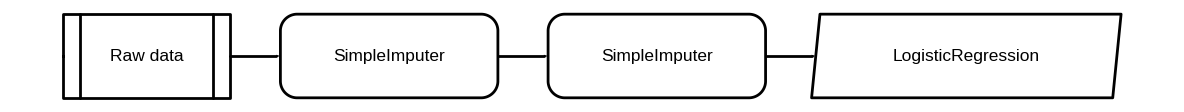

In [74]:
plot_model(tuned_model, plot = 'pipeline')

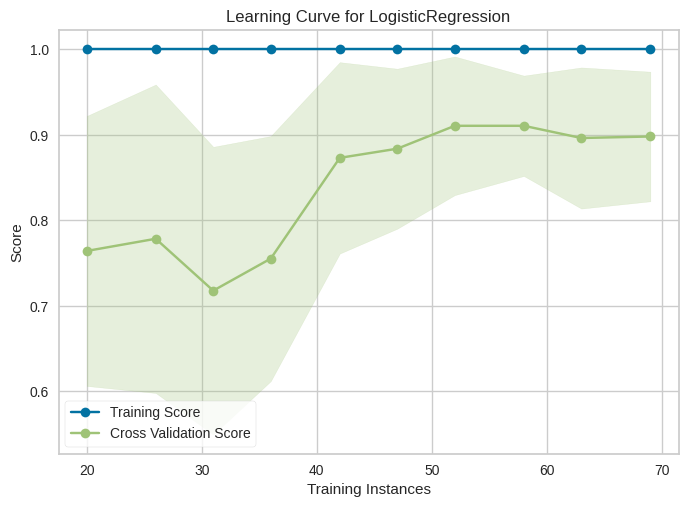

In [75]:
plot_model(tuned_model, plot = 'learning')

In [76]:
save_model(tuned_model, './pickle_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['comp_0', 'comp_1', 'comp_2',
                                              'comp_3', 'comp_4', 'comp_5',
                                              'comp_6', 'comp_7', 'comp_8',
                                              'comp_9', 'comp_10', 'comp_11',
                                              'comp_12', 'comp_13', 'comp_14',
                                              'comp_15', 'comp_16', 'comp_17',
                                              'comp_18', 'comp_19', 'comp_20',
                                              'comp_21', 'comp_22', 'comp_23',
                                              'c...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
            